# **1. Perkenalan Dataset**


Tahap pertama, Anda harus mencari dan menggunakan dataset dengan ketentuan sebagai berikut:

1. **Sumber Dataset**:  
   Dataset dapat diperoleh dari berbagai sumber, seperti public repositories (*Kaggle*, *UCI ML Repository*, *Open Data*) atau data primer yang Anda kumpulkan sendiri.


# **2. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning atau deep learning.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.impute import SimpleImputer


# **3. Memuat Dataset**

Pada tahap ini, Anda perlu memuat dataset ke dalam notebook. Jika dataset dalam format CSV, Anda bisa menggunakan pustaka pandas untuk membacanya. Pastikan untuk mengecek beberapa baris awal dataset untuk memahami strukturnya dan memastikan data telah dimuat dengan benar.

Jika dataset berada di Google Drive, pastikan Anda menghubungkan Google Drive ke Colab terlebih dahulu. Setelah dataset berhasil dimuat, langkah berikutnya adalah memeriksa kesesuaian data dan siap untuk dianalisis lebih lanjut.

Jika dataset berupa unstructured data, silakan sesuaikan dengan format seperti kelas Machine Learning Pengembangan atau Machine Learning Terapan

In [3]:
data = pd.read_csv('Mall_Customers.csv')

print(data.head())


   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40


# **4. Exploratory Data Analysis (EDA)**

Pada tahap ini, Anda akan melakukan **Exploratory Data Analysis (EDA)** untuk memahami karakteristik dataset.

Tujuan dari EDA adalah untuk memperoleh wawasan awal yang mendalam mengenai data dan menentukan langkah selanjutnya dalam analisis atau pemodelan.

In [4]:
data.info()
print(data.describe())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB
       CustomerID         Age  Annual Income (k$)  Spending Score (1-100)
count  200.000000  200.000000          200.000000              200.000000
mean   100.500000   38.850000           60.560000               50.200000
std     57.879185   13.969007           26.264721               25.823522
min      1.000000   18.000000           15.000000                1.000000
25%     50.750000   28.750000           41.500000               34.750000
50%    100.500000   36.000000         

# **5. Data Preprocessing**

Pada tahap ini, data preprocessing adalah langkah penting untuk memastikan kualitas data sebelum digunakan dalam model machine learning.

Jika Anda menggunakan data teks, data mentah sering kali mengandung nilai kosong, duplikasi, atau rentang nilai yang tidak konsisten, yang dapat memengaruhi kinerja model. Oleh karena itu, proses ini bertujuan untuk membersihkan dan mempersiapkan data agar analisis berjalan optimal.

Berikut adalah tahapan-tahapan yang bisa dilakukan, tetapi **tidak terbatas** pada:
1. Menghapus atau Menangani Data Kosong (Missing Values)
2. Menghapus Data Duplikat
3. Normalisasi atau Standarisasi Fitur
4. Deteksi dan Penanganan Outlier
5. Encoding Data Kategorikal
6. Binning (Pengelompokan Data)

Cukup sesuaikan dengan karakteristik data yang kamu gunakan yah. Khususnya ketika kami menggunakan data tidak terstruktur.

In [5]:
print(data.isnull().sum())


CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64


In [6]:

data.drop_duplicates(inplace=True)

print(data.duplicated().sum())


0


In [7]:
from sklearn.preprocessing import StandardScaler

X = data[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

print(X_scaled[:5])


[[-1.42456879 -1.73899919 -0.43480148]
 [-1.28103541 -1.73899919  1.19570407]
 [-1.3528021  -1.70082976 -1.71591298]
 [-1.13750203 -1.70082976  1.04041783]
 [-0.56336851 -1.66266033 -0.39597992]]


In [8]:
data['Gender'] = data['Gender'].map({'Male': 0, 'Female': 1})

print(data['Gender'].head())


0    0
1    0
2    1
3    1
4    1
Name: Gender, dtype: int64


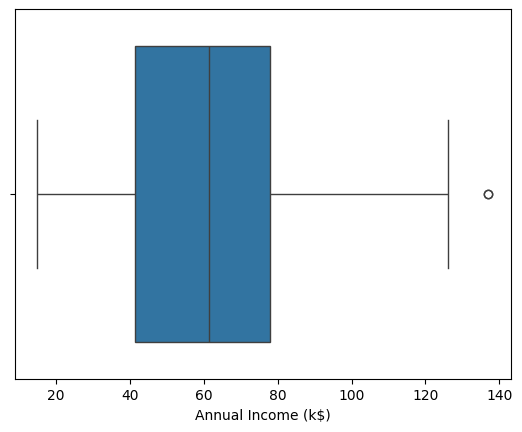

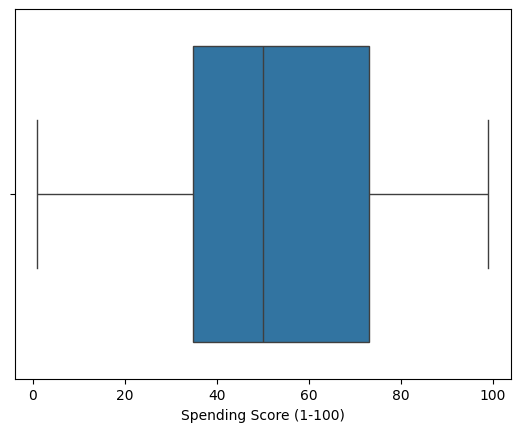

In [9]:
sns.boxplot(x=data['Annual Income (k$)'])
plt.show()

sns.boxplot(x=data['Spending Score (1-100)'])
plt.show()


In [10]:

bins = [0, 18, 35, 50, 65, np.inf]
labels = ['0-18', '19-35', '36-50', '51-65', '65+']
data['Age Group'] = pd.cut(data['Age'], bins=bins, labels=labels)

print(data[['Age', 'Age Group']].head())


   Age Age Group
0   19     19-35
1   21     19-35
2   20     19-35
3   23     19-35
4   31     19-35


In [13]:

data.to_csv('Mall_Customers_Preprocessed.csv', index=False)


In [12]:
%%writefile automate_Nama-siswa.py
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

def load_data(file_path):
    """Load the dataset from the specified file path."""
    data = pd.read_csv(file_path)
    return data

def handle_missing_values(data):
    """Handle missing values by imputing with the mean (if any)."""
    imputer = SimpleImputer(strategy='mean')
    data[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']] = imputer.fit_transform(data[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']])
    return data

def remove_duplicates(data):
    """Remove duplicate rows if any."""
    data.drop_duplicates(inplace=True)
    return data

def normalize_data(data):
    """Normalize the relevant numeric columns."""
    scaler = StandardScaler()
    scaled_data = scaler.fit_transform(data[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']])
    return scaled_data

def handle_outliers(data):
    """Handle outliers by capping values."""
    data['Annual Income (k$)'] = np.where(data['Annual Income (k$)'] > 120, 120, data['Annual Income (k$)'])
    return data

def encode_gender(data):
    """Encode the 'Gender' column."""
    data['Gender'] = data['Gender'].map({'Male': 0, 'Female': 1})
    return data

def save_preprocessed_data(data, output_path):
    """Save the preprocessed data to a CSV file."""
    data.to_csv(output_path, index=False)


def preprocess_data(input_file, output_file):
    """Run the entire preprocessing pipeline."""
    data = load_data(input_file)
    data = handle_missing_values(data)
    data = remove_duplicates(data)
    data = handle_outliers(data)
    data = encode_gender(data)
    scaled_data = normalize_data(data)

    save_preprocessed_data(data, output_file)

    return scaled_data

if __name__ == "__main__":
    input_file = 'Mall_Customers.csv'
    output_file = 'Mall_Customers_Preprocessed.csv'

    scaled_data = preprocess_data(input_file, output_file)
    print(f"Preprocessing completed. Processed data saved to {output_file}.")


Writing automate_Nama-siswa.py
